# Decision Tree Classification

## Importing the libraries

In [400]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as d
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

## Importing the dataset

In [401]:
dataset = pd.read_csv('data.csv')
X = dataset.drop(columns=['Bankrupt?'])
y = dataset['Bankrupt?']

In [402]:
first_5 = X.loc[:, [' Borrowing dependency',
 ' Persistent EPS in the Last Four Seasons',
 ' Allocation rate per person',
 ' Net Income to Total Assets',
 ' Continuous interest rate (after tax)']]

In [403]:
first_10 = X.loc[: , [' Borrowing dependency',
 ' Persistent EPS in the Last Four Seasons',
 ' Allocation rate per person',
 ' Net Income to Total Assets',
 ' Continuous interest rate (after tax)',
 ' Quick Ratio',
 ' Non-industry income and expenditure/revenue',
 ' Cash Flow to Total Assets',
 ' Inventory/Working Capital',
 ' Interest-bearing debt interest rate']]

In [404]:
non_0 = X.loc[:, [' Borrowing dependency',
 ' Persistent EPS in the Last Four Seasons',
 ' Continuous interest rate (after tax)',
 ' Quick Ratio',
 ' Net Income to Total Assets',
 ' Non-industry income and expenditure/revenue',
 ' Cash Flow to Total Assets',
 ' Allocation rate per person',
 ' Inventory/Working Capital',
 ' Average Collection Days',
 ' Interest-bearing debt interest rate',
 ' Inventory Turnover Rate (times)',
 ' Fixed Assets Turnover Frequency',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Operating Profit Rate',
 ' Current Liability to Liability',
 ' ROA(B) before interest and depreciation after tax',
 ' Realized Sales Gross Profit Growth Rate',
 ' Revenue Per Share (Yuan ¥)',
 ' Cash/Total Assets',
 ' Total Asset Growth Rate',
 ' Accounts Receivable Turnover',
 ' Total expense/Assets',
 ' Cash Flow to Sales',
 ' Cash Flow Per Share',
 ' Cash Flow to Equity',
 ' Current Assets/Total Assets',
 ' Operating profit per person',
 ' Current Asset Turnover Rate',
 ' Research and development expense rate',
 ' Interest Expense Ratio',
 ' No-credit Interval',
 ' Inventory/Current Liability',
 ' Net worth/Assets',
 ' Operating profit/Paid-in capital',
 ' Net Value Growth Rate',
 ' Interest Coverage Ratio (Interest expense to EBIT)',
 ' Quick Assets/Current Liability',
 ' Inventory and accounts receivable/Net value',
 ' Operating Expense Rate',
 ' Retained Earnings to Total Assets',
 ' Total Asset Return Growth Rate Ratio',
 ' Total income/Total expense',
 ' Revenue per person',
 ' Cash Turnover Rate',
 ' Degree of Financial Leverage (DFL)',
 ' Contingent liabilities/Net worth',
 ' Quick Assets/Total Assets',
 ' Quick Asset Turnover Rate']]

## Splitting the dataset into the Training set and Test set

In [405]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
# X_train, X_test, y_train, y_test = train_test_split(first_5, y, test_size = 0.25, random_state = 0)
# X_train, X_test, y_train, y_test = train_test_split(first_10, y, test_size = 0.25, random_state = 0)
# X_train, X_test, y_train, y_test = train_test_split(non_0, y, test_size = 0.25, random_state = 0)

In [406]:
type(X)

pandas.core.frame.DataFrame

In [407]:
type(X_train)

pandas.core.frame.DataFrame

In [408]:
print(y_train)

2303    0
3719    0
5893    0
4063    0
3989    0
       ..
4931    0
3264    0
1653    0
2607    0
2732    0
Name: Bankrupt?, Length: 5114, dtype: int64


In [409]:
print(X_test)

       ROA(C) before interest and depreciation before interest  \
4929                                           0.481207          
6424                                           0.501828          
3807                                           0.517574          
2011                                           0.521669          
6728                                           0.492176          
...                                                 ...          
3180                                           0.456686          
6112                                           0.598986          
4490                                           0.501682          
4617                                           0.512846          
6526                                           0.540340          

       ROA(A) before interest and % after tax  \
4929                                 0.469418   
6424                                 0.557894   
3807                                 0.537505   
2011       

In [410]:
print(y_test)

4929    0
6424    0
3807    0
2011    0
6728    1
       ..
3180    0
6112    0
4490    0
4617    0
6526    0
Name: Bankrupt?, Length: 1705, dtype: int64


## Training the Decision Tree Classification model on the Training set

In [411]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [412]:
df = pd.Series(classifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [413]:
df

 Borrowing dependency                       0.229769
 Persistent EPS in the Last Four Seasons    0.131620
 Allocation rate per person                 0.033865
 Net Income to Total Assets                 0.032755
 Continuous interest rate (after tax)       0.031397
                                              ...   
 Net Worth Turnover Rate (times)            0.000000
 Working Capital to Total Assets            0.000000
 Operating Funds to Liability               0.000000
 Current Liabilities/Liability              0.000000
 Equity to Liability                        0.000000
Length: 95, dtype: float64

In [414]:
list(df.index)

[' Borrowing dependency',
 ' Persistent EPS in the Last Four Seasons',
 ' Allocation rate per person',
 ' Net Income to Total Assets',
 ' Continuous interest rate (after tax)',
 ' Quick Ratio',
 ' Non-industry income and expenditure/revenue',
 ' Cash Flow to Total Assets',
 ' Inventory/Working Capital',
 ' Interest-bearing debt interest rate',
 ' Inventory Turnover Rate (times)',
 ' Average Collection Days',
 ' Realized Sales Gross Profit Growth Rate',
 ' Fixed Assets Turnover Frequency',
 ' Operating Profit Rate',
 ' Current Liability to Liability',
 ' ROA(B) before interest and depreciation after tax',
 ' No-credit Interval',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Cash/Total Assets',
 ' Total Asset Growth Rate',
 ' Accounts Receivable Turnover',
 ' Cash Flow to Sales',
 ' Inventory and accounts receivable/Net value',
 ' Revenue per person',
 ' Interest Expense Ratio',
 ' Total income/Total expense',
 ' Inventory/Current Liability',
 ' Revenue Per Share (Yuan ¥)',
 ' Net worth/As

In [415]:
df.values

array([0.22976896, 0.13162049, 0.03386472, 0.0327546 , 0.03139728,
       0.02901493, 0.02705448, 0.02251439, 0.02205125, 0.02120905,
       0.01958888, 0.01894249, 0.01710246, 0.01685902, 0.01683712,
       0.01654042, 0.01591358, 0.01458814, 0.01404032, 0.013531  ,
       0.01332423, 0.01292363, 0.01189178, 0.0104841 , 0.00974488,
       0.00905191, 0.00876444, 0.00840445, 0.0081932 , 0.00811984,
       0.00794932, 0.0079452 , 0.00780216, 0.00773266, 0.00770767,
       0.00733958, 0.00728976, 0.0067708 , 0.00673088, 0.00667971,
       0.00645057, 0.00622045, 0.00609572, 0.00606863, 0.00605822,
       0.00582782, 0.00578889, 0.00566651, 0.00535765, 0.00527498,
       0.00526638, 0.004284  , 0.0033854 , 0.00304352, 0.00258375,
       0.00258375, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [416]:
df = df.to_frame().reset_index()

In [417]:
df.columns = ['Features', 'Value']

In [418]:
df.loc[df.Value > 0, :]

,Features,Value
0,Borrowing dependency,0.229769
1,Persistent EPS in the Last Four Seasons,0.131620
2,Allocation rate per person,0.033865
3,Net Income to Total Assets,0.032755
4,Continuous interest rate (after tax),0.031397
5,Quick Ratio,0.029015
6,Non-industry income and expenditure/revenue,0.027054
7,Cash Flow to Total Assets,0.022514
8,Inventory/Working Capital,0.022051
9,Interest-bearing debt interest rate,0.021209


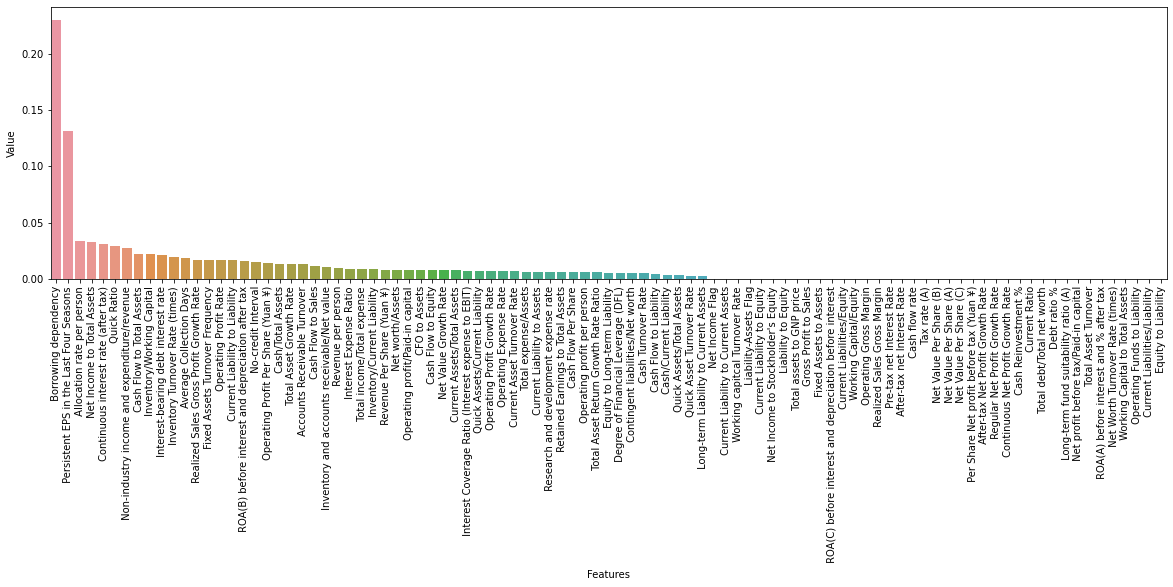

In [419]:
plt.figure(figsize=(20,5))
_=sns.barplot(data=df, x='Features', y='Value')
_=plt.xticks(rotation=90)

In [420]:
classifier.feature_importances_

array([0.        , 0.        , 0.01591358, 0.        , 0.        ,
       0.01683712, 0.        , 0.        , 0.02705448, 0.03139728,
       0.00673088, 0.00609572, 0.        , 0.02120905, 0.        ,
       0.        , 0.        , 0.        , 0.13162049, 0.00605822,
       0.0081932 , 0.01404032, 0.        , 0.01710246, 0.0067708 ,
       0.        , 0.        , 0.        , 0.01332423, 0.00773266,
       0.00578889, 0.        , 0.        , 0.02901493, 0.00905191,
       0.        , 0.        , 0.00811984, 0.        , 0.22976896,
       0.00527498, 0.00794932, 0.        , 0.0104841 , 0.        ,
       0.01292363, 0.01894249, 0.01958888, 0.01685902, 0.        ,
       0.00974488, 0.00582782, 0.03386472, 0.        , 0.00304352,
       0.00770767, 0.013531  , 0.00728976, 0.0033854 , 0.00622045,
       0.        , 0.02205125, 0.00840445, 0.        , 0.        ,
       0.        , 0.00258375, 0.00606863, 0.00876444, 0.00645057,
       0.00667971, 0.00258375, 0.        , 0.00526638, 0.01189

In [421]:
y_pred_adj = classifier.predict(X_test)

In [422]:
classifier.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [423]:
y_pred = classifier.predict_proba(X_test)[:, 1]

In [424]:
y_test_arr = y_test.values
type(y_pred)

numpy.ndarray

In [425]:
p, r, thresholds = precision_recall_curve(y_test_arr, y_pred)

In [426]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

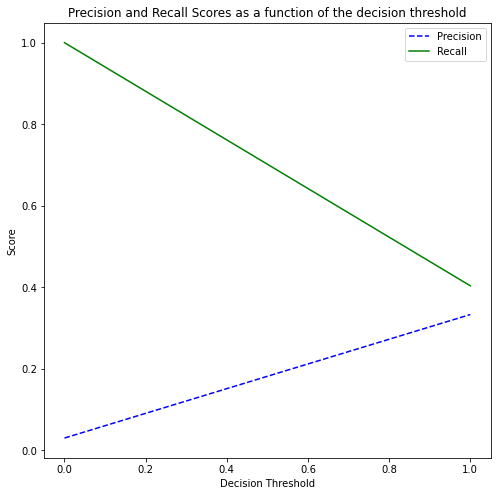

In [427]:
plot_precision_recall_vs_threshold(p, r, thresholds)

## Making the Confusion Matrix

In [428]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print (classification_report(y_test, y_pred))

[[1611   42]
 [  31   21]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1653
           1       0.33      0.40      0.37        52

    accuracy                           0.96      1705
   macro avg       0.66      0.69      0.67      1705
weighted avg       0.96      0.96      0.96      1705



In [429]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [430]:
grid_search = GridSearchCV(estimator=classifier, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [431]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [432]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=100, random_state=0)

In [433]:
dt_best = grid_search.best_estimator_

In [434]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1653
           1       0.00      0.00      0.00        52

    accuracy                           0.97      1705
   macro avg       0.48      0.50      0.49      1705
weighted avg       0.94      0.97      0.95      1705



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
